In [ ]:
# Translation [-3,3]
# Scale [2, 0.5]
# Rotation [0, 360]
# Reflection {-1, 1}
# Shear [-0.2, 0.2]

In [347]:
import matplotlib.pyplot as plt

In [1]:
import numpy as np

In [95]:
from scipy.stats import special_ortho_group

In [90]:
def append_translation_matrix(matrix, low=-2, high=2):
    nb_dims = len(matrix) - 1
    translations = np.random.random(nb_dims)*(high-low) + low
    matrix[:-1, -1] = translations
    return matrix

In [117]:
def append_scaling_matrix(matrix, low=0.5, high=1.5):
    nb_dims = len(matrix) - 1
    reflections = np.random.randint(-1, 1, nb_dims) * 2 + 1
    scaling_factors = np.random.random(nb_dims) * (high-low) + low
    indices = np.arange(0, nb_dims)
    matrix[indices, indices] = matrix[indices, indices] * scaling_factors * reflections
    return matrix

In [120]:
def half_nb_factors(ndim):
    return ndim*(ndim-1) / 2

In [302]:
def create_shear_matrix(ndim, nb_factors, low=-0.2, high=0.2):
    offset = 1
    
    indices_triu = np.triu_indices(ndim, offset)
    indices_tril = np.tril_indices(ndim, -offset)
    
    len_indices = len(indices_tril[0])
    
    indices = [[], []]
    for i in range(len_indices):
        choose_u = np.random.random() > 0.5
        if choose_u:
            indices[0].append(indices_triu[0][i])
            indices[1].append(indices_triu[1][i])
        else:
            indices[0].append(indices_tril[0][i])
            indices[1].append(indices_tril[1][i])
    
    shear_factors = np.random.random(nb_factors) * (high-low) + low
    
    shears = np.zeros(len_indices)
    shears[:nb_factors] = shear_factors
    np.random.shuffle(shears)
    
    shear_matrix = np.eye(ndim)
    shear_matrix[indices[0], indices[1]] = shears
    
    return shear_matrix

In [278]:
vector = np.array([1, 2])

In [339]:
np.random.seed(0)

shear_matrix = create_shear_matrix(3, 2)

rotation_matrix = special_ortho_group(3, 0).rvs(1)

matrix = np.eye(3 + 1)
matrix = append_translation_matrix(matrix, low=-3, high=3)
matrix = append_scaling_matrix(matrix, low=0.5, high=2)

shear_matrix, rotation_matrix, matrix

(array([[ 1.        ,  0.        ,  0.01795327],
        [ 0.        ,  1.        , -0.03053808],
        [ 0.        ,  0.        ,  1.        ]]),
 array([[-0.85771824,  0.45413047, -0.24100817],
        [-0.1945646 , -0.720634  , -0.66545567],
        [-0.47588238, -0.52388181,  0.70645864]]),
 array([[-1.71825309,  0.        ,  0.        , -0.37447673],
        [ 0.        ,  1.21996576,  0.        ,  2.350638  ],
        [ 0.        ,  0.        , -1.08917719,  2.78197656],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]))

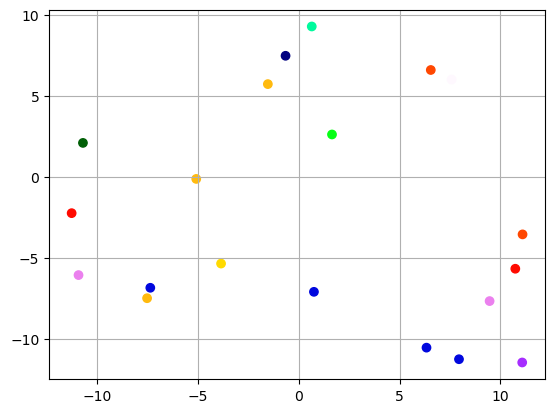

In [376]:
nb_samples = 20
XY = np.random.random((nb_samples, 2)) * 24 - 12
C = np.random.randint(0,20, nb_samples)
plt.scatter(XY[:, 0], XY[:, 1], c=C, cmap='gist_ncar')
plt.grid()

In [377]:
matrix = np.eye(2 + 1)
matrix = append_translation_matrix(matrix, low=-3, high=3)
matrix = append_scaling_matrix(matrix, low=0.5, high=2)

In [378]:
matrix

array([[-1.40384142,  0.        ,  0.98754446],
       [ 0.        , -1.67947847, -0.84864867],
       [ 0.        ,  0.        ,  1.        ]])

In [379]:
scale_transl_inverse_XY = (matrix @ np.hstack([XY, np.ones((nb_samples, 1))]).T).T

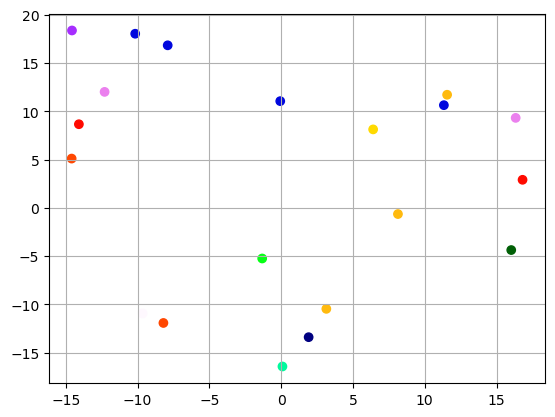

In [380]:
plt.scatter(scale_transl_inverse_XY[:, 0], scale_transl_inverse_XY[:, 1], c=C, cmap='gist_ncar')
plt.grid()

In [384]:
sti_XY = np.hstack([scale_transl_inverse_XY[:, [0]], scale_transl_inverse_XY[:, [1]]])

In [411]:
rotation_matrix = special_ortho_group(2, 0).rvs(1)
rotation_matrix

array([[-0.97522402, -0.22121958],
       [ 0.22121958, -0.97522402]])

In [407]:
rotated_XY = (rotation_matrix @ sti_XY.T).T

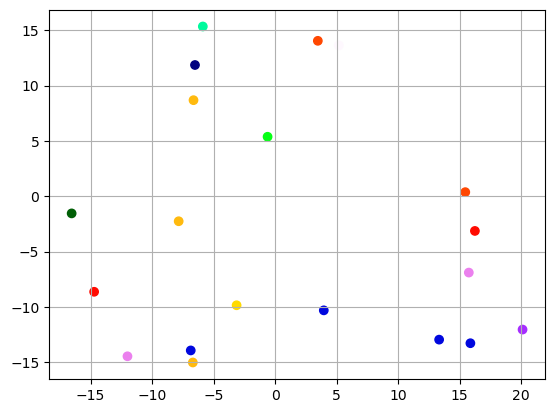

In [408]:
plt.scatter(rotated_XY[:, 0], rotated_XY[:, 1], c=C, cmap='gist_ncar')
plt.grid()

In [412]:
shear_matrix = create_shear_matrix(2, 1)
shear_matrix

array([[1.        , 0.        ],
       [0.12583706, 1.        ]])

In [414]:
sheared_XY = (shear_matrix @ rotated_XY.T).T

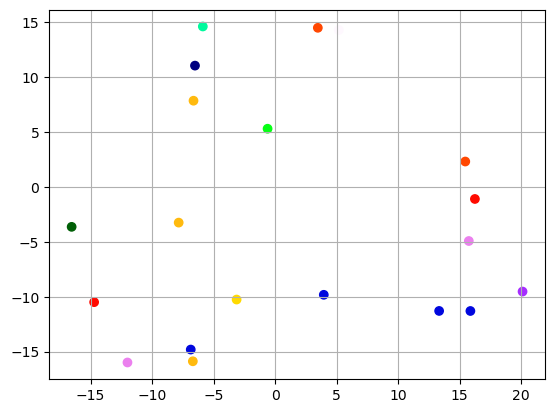

In [415]:
plt.scatter(sheared_XY[:, 0], sheared_XY[:, 1], c=C, cmap='gist_ncar')
plt.grid()

In [416]:
rectangle = np.array([[0, 0], [0, 1], [2, 1], [2, 0], [0, 0]])

In [418]:
transformed_rectangle = np.dot(np.c_[rectangle, np.ones(len(rectangle))], matrix.T)

(-1.9605225140082885,
 1.1279286062579805,
 -2.612101061182609,
 -0.764674748834532)

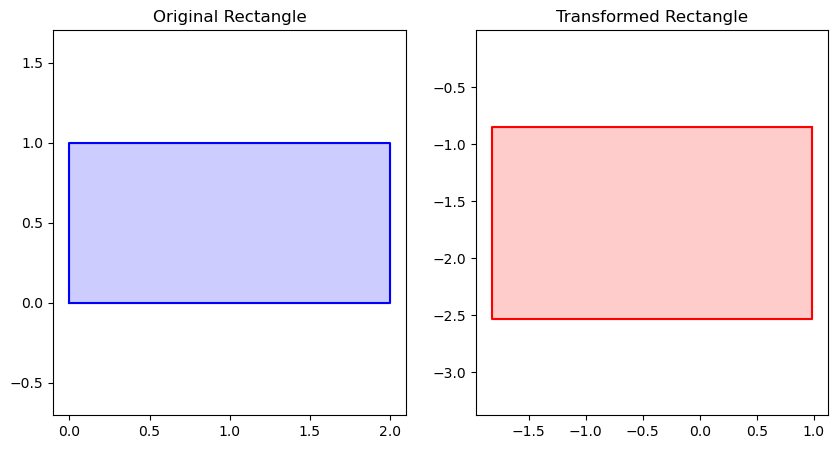

In [419]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot original rectangle
ax[0].plot(rectangle[:, 0], rectangle[:, 1], 'b-')
ax[0].fill(rectangle[:, 0], rectangle[:, 1], color='blue', alpha=0.2)
ax[0].set_title('Original Rectangle')
ax[0].axis('equal')

# Plot transformed rectangle
ax[1].plot(transformed_rectangle[:, 0], transformed_rectangle[:, 1], 'r-')
ax[1].fill(transformed_rectangle[:, 0], transformed_rectangle[:, 1], color='red', alpha=0.2)
ax[1].set_title('Transformed Rectangle')
ax[1].axis('equal')

In [420]:
transformed_rectangle = np.dot(rectangle, shear_matrix.T)

(-0.1, 2.1, -0.06258370633947279, 1.3142578331289285)

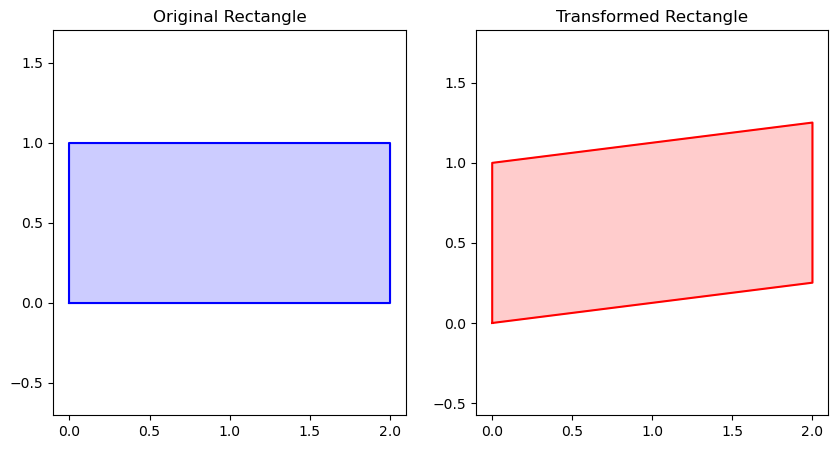

In [421]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot original rectangle
ax[0].plot(rectangle[:, 0], rectangle[:, 1], 'b-')
ax[0].fill(rectangle[:, 0], rectangle[:, 1], color='blue', alpha=0.2)
ax[0].set_title('Original Rectangle')
ax[0].axis('equal')

# Plot transformed rectangle
ax[1].plot(transformed_rectangle[:, 0], transformed_rectangle[:, 1], 'r-')
ax[1].fill(transformed_rectangle[:, 0], transformed_rectangle[:, 1], color='red', alpha=0.2)
ax[1].set_title('Transformed Rectangle')
ax[1].axis('equal')

In [422]:
transformed_rectangle = np.dot(rectangle, rotation_matrix.T)

(-2.280251011106455,
 0.10858338148125977,
 -1.0461071831382243,
 0.5133223237080009)

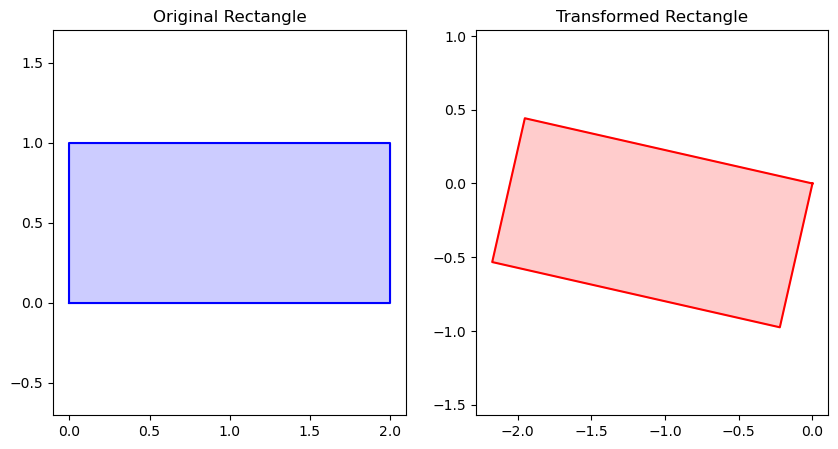

In [423]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot original rectangle
ax[0].plot(rectangle[:, 0], rectangle[:, 1], 'b-')
ax[0].fill(rectangle[:, 0], rectangle[:, 1], color='blue', alpha=0.2)
ax[0].set_title('Original Rectangle')
ax[0].axis('equal')

# Plot transformed rectangle
ax[1].plot(transformed_rectangle[:, 0], transformed_rectangle[:, 1], 'r-')
ax[1].fill(transformed_rectangle[:, 0], transformed_rectangle[:, 1], color='red', alpha=0.2)
ax[1].set_title('Transformed Rectangle')
ax[1].axis('equal')

In [424]:
# PAD v2

In [537]:
nb_paddings = 1

low_thr, high_thr = -1, 1
low_c, high_c = 0.5, 3

# samples x features
nb_samples=10
arr = np.random.random((nb_samples, 3)) * 12 - 6
padding = np.zeros((nb_samples, nb_paddings))
arr_padded = np.hstack([arr, padding])

chosen_axis = np.random.choice(np.arange(arr.shape[1]), nb_paddings, replace=False)


for j, ax in enumerate(chosen_axis):
    thr = np.random.random() * (high_thr - low_thr) + low_thr
    C1 = np.random.random() * (high_c - low_c) + low_c
    C2 = np.random.random() * (high_c - low_c) + low_c

    for i in range(nb_samples):
        if arr_padded[i, ax] < thr:
            arr_padded[i, ax] += C1
            arr_padded[i, -1-j] = thr - C2
        else:
            arr_padded[i, ax] = thr + C1
            arr_padded[i, -1-j] += arr[i, ax] - C2

In [540]:
arr

array([[-4.54154121, -4.81003858, -5.62845079],
       [ 1.46981849, -2.21771227,  4.83271664],
       [ 5.65385693, -2.82412709,  4.39743711],
       [-1.6238449 , -2.95671145,  1.16265364],
       [ 4.95204745, -4.37867883, -2.99109807],
       [-5.55546496, -2.37326313,  2.54649977],
       [-4.7671884 , -2.41000207,  0.6355839 ],
       [ 3.49354328,  5.87046328, -0.88592095],
       [ 0.26138479,  4.47505846, -0.37704782],
       [-3.43367179,  4.67364341,  2.75231667]])

In [541]:
arr_padded

array([[-4.54154121, -4.00728138, -5.62845079, -0.59291834],
       [ 1.46981849, -1.41495507,  4.83271664, -0.59291834],
       [ 5.65385693, -2.02136989,  4.39743711, -0.59291834],
       [-1.6238449 , -2.15395425,  1.16265364, -0.59291834],
       [ 4.95204745, -3.57592163, -2.99109807, -0.59291834],
       [-5.55546496, -1.57050593,  2.54649977, -0.59291834],
       [-4.7671884 , -1.60724487,  0.6355839 , -0.59291834],
       [ 3.49354328,  0.77800732, -0.88592095,  5.30229482],
       [ 0.26138479,  0.77800732, -0.37704782,  3.90689   ],
       [-3.43367179,  0.77800732,  2.75231667,  4.10547495]])

# Shuffle

In [551]:
nb_feats = 5
features_inds = np.arange(nb_feats)
np.random.shuffle(features_inds)
features_inds

array([1, 2, 3, 4, 0])

In [552]:
X = np.random.random((10, 5))

In [553]:
X

array([[0.72337362, 0.79726127, 0.114341  , 0.96538347, 0.87018658],
       [0.88513196, 0.65113585, 0.28937276, 0.70405416, 0.77324103],
       [0.22924619, 0.85529135, 0.4906185 , 0.23282429, 0.9664142 ],
       [0.92259221, 0.71653742, 0.54041574, 0.3670957 , 0.88227142],
       [0.7734785 , 0.76723515, 0.50683875, 0.04095095, 0.55820095],
       [0.84794188, 0.50725512, 0.74190672, 0.47275874, 0.55971457],
       [0.04613954, 0.3103801 , 0.89818581, 0.30875145, 0.45356168],
       [0.56967706, 0.76546319, 0.24813171, 0.07267788, 0.85973966],
       [0.71418629, 0.77138106, 0.17081949, 0.472444  , 0.45595784],
       [0.50337291, 0.91829281, 0.99168778, 0.03164576, 0.18433363]])

In [554]:
X[:, features_inds]

array([[0.79726127, 0.114341  , 0.96538347, 0.87018658, 0.72337362],
       [0.65113585, 0.28937276, 0.70405416, 0.77324103, 0.88513196],
       [0.85529135, 0.4906185 , 0.23282429, 0.9664142 , 0.22924619],
       [0.71653742, 0.54041574, 0.3670957 , 0.88227142, 0.92259221],
       [0.76723515, 0.50683875, 0.04095095, 0.55820095, 0.7734785 ],
       [0.50725512, 0.74190672, 0.47275874, 0.55971457, 0.84794188],
       [0.3103801 , 0.89818581, 0.30875145, 0.45356168, 0.04613954],
       [0.76546319, 0.24813171, 0.07267788, 0.85973966, 0.56967706],
       [0.77138106, 0.17081949, 0.472444  , 0.45595784, 0.71418629],
       [0.91829281, 0.99168778, 0.03164576, 0.18433363, 0.50337291]])

# Diffeomorphic 

In [645]:
def displacement_LN(vectors, p=2, scaling_factor = 2):
    norms = np.linalg.norm(vectors, ord=p, axis=1)
    signs = np.sign(vectors)
    scaled_vectors = (vectors +  signs * np.log(1 + norms[:, np.newaxis])) / scaling_factor
    return scaled_vectors

0

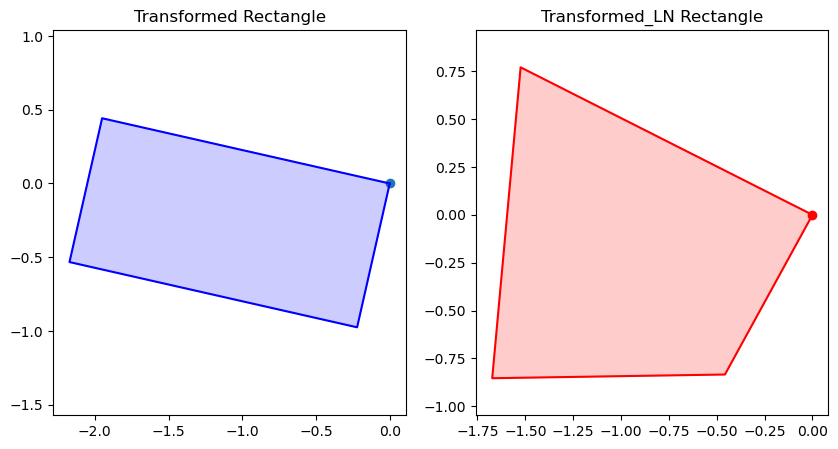

In [647]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot original rectangle
ax[0].scatter([0], [0])
ax[0].plot(transformed_rectangle[:, 0], transformed_rectangle[:, 1], 'b-')
ax[0].fill(transformed_rectangle[:, 0], transformed_rectangle[:, 1], color='blue', alpha=0.2)
ax[0].set_title('Transformed Rectangle')
ax[0].axis('equal')

transformed_LN = displacement_LN(transformed_rectangle, 2)

# Plot transformed rectangle
ax[1].scatter([0], [0], c='r')
ax[1].plot(transformed_LN[:, 0], transformed_LN[:, 1], 'r-')
ax[1].fill(transformed_LN[:, 0], transformed_LN[:, 1], color='red', alpha=0.2)
ax[1].set_title('Transformed_LN Rectangle')
ax[1].axis('equal')
0

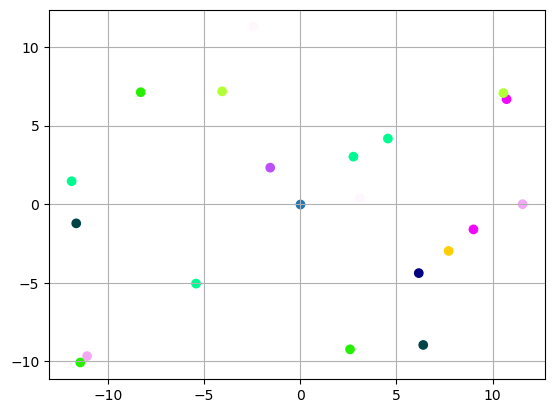

In [622]:
nb_samples = 20
XY = np.random.random((nb_samples, 2)) * 24 - 12
C = np.random.randint(0,20, nb_samples)
plt.scatter(XY[:, 0], XY[:, 1], c=C, cmap='gist_ncar')
plt.scatter([0], [0])
plt.grid()

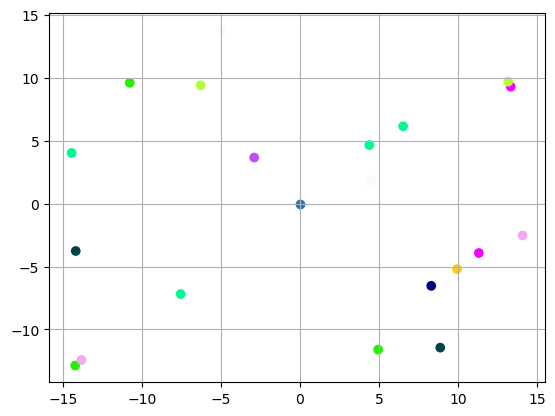

In [625]:
plt.scatter(transformed_XY[:, 0], transformed_XY[:, 1], c=C, cmap='gist_ncar')
plt.scatter([0], [0])
plt.grid()